In [1]:
# Regular EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score,cross_val_predict
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve,roc_auc_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('sonar.csv',names=range(0,61),header=0)
df

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
1,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
2,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
3,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
4,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,M
203,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,M
204,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,M
205,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,M


In [3]:
from sklearn.decomposition import PCA
data=df.iloc[:,0:-1]


In [4]:
target=df.iloc[:,-1]
target

0      R
1      R
2      R
3      R
4      R
      ..
202    M
203    M
204    M
205    M
206    M
Name: 60, Length: 207, dtype: object

In [5]:
pca=PCA(n_components=10)
data=pca.fit_transform(data)
data

array([[-0.97028528,  1.01765376,  0.83043188, ...,  0.38483746,
         0.00432916, -0.08267912],
       [-0.32443537,  0.87687629,  0.22820349, ...,  0.08107182,
         0.01418477, -0.43233413],
       [ 0.85357147,  0.69773427, -0.02360152, ..., -0.21542372,
        -0.53395533, -0.42518212],
       ...,
       [ 0.30676251, -1.1477555 ,  0.24897546, ...,  0.2278663 ,
        -0.07013224, -0.31329401],
       [-0.03808313, -0.99404889,  0.20193818, ...,  0.06950374,
        -0.02440647, -0.16530256],
       [-0.04390414, -0.91080234,  0.00916917, ..., -0.01910024,
         0.12012993, -0.13796362]])

In [6]:
data=pd.DataFrame(data=data)
data

,0,1,2,3,4,5,6,7,8,9
0,-0.970285,1.017654,0.830432,0.120147,0.299120,0.202682,-0.226988,0.384837,0.004329,-0.082679
1,-0.324435,0.876876,0.228203,0.868926,0.098053,-0.269122,-0.421778,0.081072,0.014185,-0.432334
2,0.853571,0.697734,-0.023602,-0.123425,-0.584388,0.351808,0.478187,-0.215424,-0.533955,-0.425182
3,-0.061337,0.226034,0.635198,0.152907,0.150982,0.081111,-0.374523,0.070143,0.119454,-0.427480
4,-0.605423,0.901962,0.804550,0.271896,0.496832,0.464410,-0.224909,0.105504,-0.202842,-0.235048
...,...,...,...,...,...,...,...,...,...,...
202,0.049918,-1.028980,0.265634,0.026018,-0.014738,0.097506,0.012021,0.178998,0.029362,-0.268631
203,0.228374,-1.149870,0.200437,0.043461,0.182020,0.010158,0.084858,0.266152,-0.068963,-0.307679
204,0.306763,-1.147756,0.248975,-0.058557,0.161337,0.013778,0.049391,0.227866,-0.070132,-0.313294
205,-0.038083,-0.994049,0.201938,-0.060790,-0.147673,-0.088874,0.018656,0.069504,-0.024406,-0.165303


In [7]:
 data['target']=target

In [9]:
from sklearn.preprocessing import LabelEncoder    
le=LabelEncoder()


In [10]:
data['target']=le.fit_transform(data['target'])
data

,0,1,2,3,4,5,6,7,8,9,target
0,-0.970285,1.017654,0.830432,0.120147,0.299120,0.202682,-0.226988,0.384837,0.004329,-0.082679,1
1,-0.324435,0.876876,0.228203,0.868926,0.098053,-0.269122,-0.421778,0.081072,0.014185,-0.432334,1
2,0.853571,0.697734,-0.023602,-0.123425,-0.584388,0.351808,0.478187,-0.215424,-0.533955,-0.425182,1
3,-0.061337,0.226034,0.635198,0.152907,0.150982,0.081111,-0.374523,0.070143,0.119454,-0.427480,1
4,-0.605423,0.901962,0.804550,0.271896,0.496832,0.464410,-0.224909,0.105504,-0.202842,-0.235048,1
...,...,...,...,...,...,...,...,...,...,...,...
202,0.049918,-1.028980,0.265634,0.026018,-0.014738,0.097506,0.012021,0.178998,0.029362,-0.268631,0
203,0.228374,-1.149870,0.200437,0.043461,0.182020,0.010158,0.084858,0.266152,-0.068963,-0.307679,0
204,0.306763,-1.147756,0.248975,-0.058557,0.161337,0.013778,0.049391,0.227866,-0.070132,-0.313294,0
205,-0.038083,-0.994049,0.201938,-0.060790,-0.147673,-0.088874,0.018656,0.069504,-0.024406,-0.165303,0


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 11 columns):
0         207 non-null float64
1         207 non-null float64
2         207 non-null float64
3         207 non-null float64
4         207 non-null float64
5         207 non-null float64
6         207 non-null float64
7         207 non-null float64
8         207 non-null float64
9         207 non-null float64
target    207 non-null int32
dtypes: float64(10), int32(1)
memory usage: 17.1 KB


In [13]:
data.isnull().sum()

0         0
1         0
2         0
3         0
4         0
5         0
6         0
7         0
8         0
9         0
target    0
dtype: int64

In [14]:
data.describe()

,0,1,2,3,4,5,6,7,8,9,target
count,2.070000e+02,2.070000e+02,2.070000e+02,2.070000e+02,2.070000e+02,2.070000e+02,2.070000e+02,2.070000e+02,2.070000e+02,2.070000e+02,207.000000
mean,5.953370e-17,9.600479e-17,-1.405377e-17,-7.736699e-17,-5.457256e-17,-2.594543e-17,1.080054e-16,7.676361e-17,-4.149928e-17,6.033821e-17,0.463768
std,7.483084e-01,5.979380e-01,3.867577e-01,3.358322e-01,3.007149e-01,2.794417e-01,2.701564e-01,2.149771e-01,1.979075e-01,1.824339e-01,0.499894
min,-1.400483e+00,-1.149870e+00,-9.271157e-01,-7.043437e-01,-7.021742e-01,-5.731973e-01,-7.418372e-01,-6.404248e-01,-5.872373e-01,-5.274440e-01,0.000000
25%,-5.858327e-01,-4.535057e-01,-2.352042e-01,-2.264010e-01,-2.173866e-01,-1.843344e-01,-1.765243e-01,-1.330234e-01,-1.133736e-01,-9.989902e-02,0.000000
50%,4.991800e-02,-5.663978e-02,-1.530817e-02,-2.208635e-02,7.676589e-03,-4.602056e-03,-1.318133e-02,4.962341e-03,-1.542833e-02,2.484047e-03,0.000000
75%,4.910975e-01,3.986697e-01,2.146323e-01,2.109728e-01,1.950131e-01,1.691461e-01,1.217503e-01,1.188499e-01,9.952790e-02,1.114356e-01,1.000000
max,1.704758e+00,1.483897e+00,1.098007e+00,9.234228e-01,7.933962e-01,8.335477e-01,8.895701e-01,6.485273e-01,5.874626e-01,5.617092e-01,1.000000


In [16]:
data.skew()

0         0.182486
1         0.412060
2         0.182902
3         0.438051
4        -0.057592
5         0.283933
6         0.415527
7         0.060027
8         0.226722
9        -0.297189
target    0.146372
dtype: float64

In [17]:
for i in data.columns:
    if data.skew().loc[i]>0.55:
        data[i]=np.log1p(data[i])

In [18]:
data.skew()

0         0.182486
1         0.412060
2         0.182902
3         0.438051
4        -0.057592
5         0.283933
6         0.415527
7         0.060027
8         0.226722
9        -0.297189
target    0.146372
dtype: float64

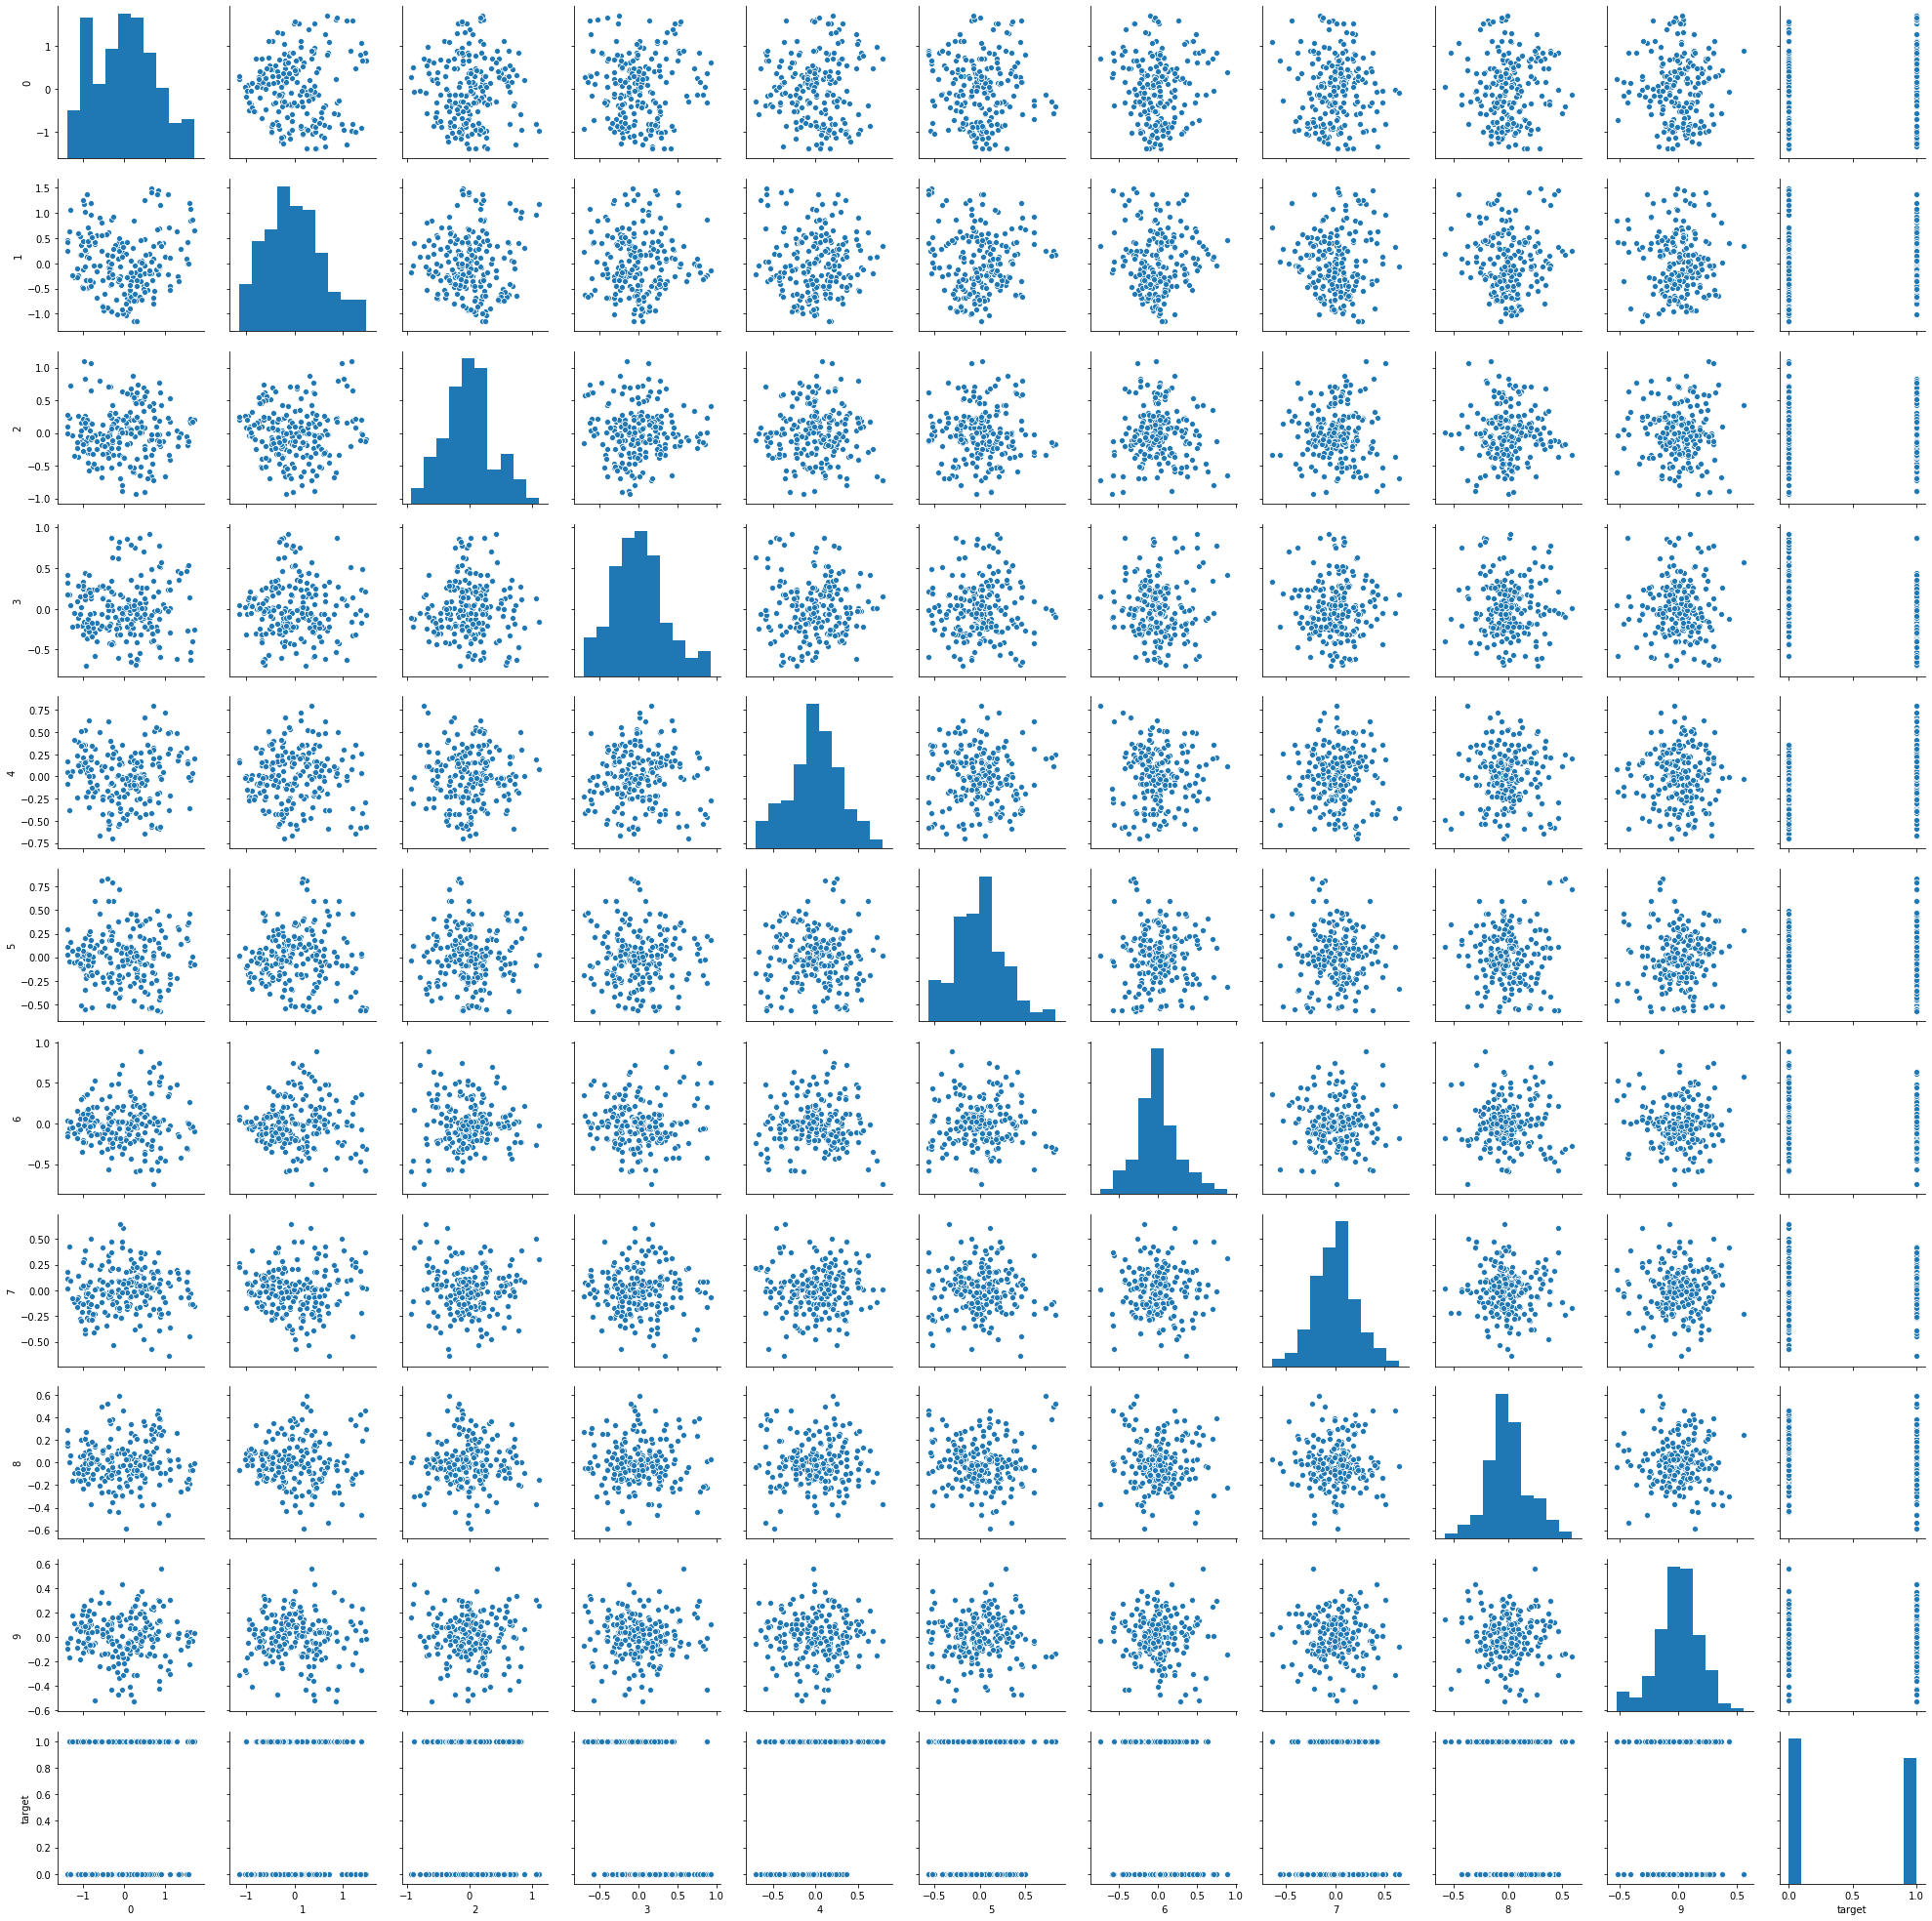

In [19]:
sns.pairplot(data)

(11.0, 0.0)

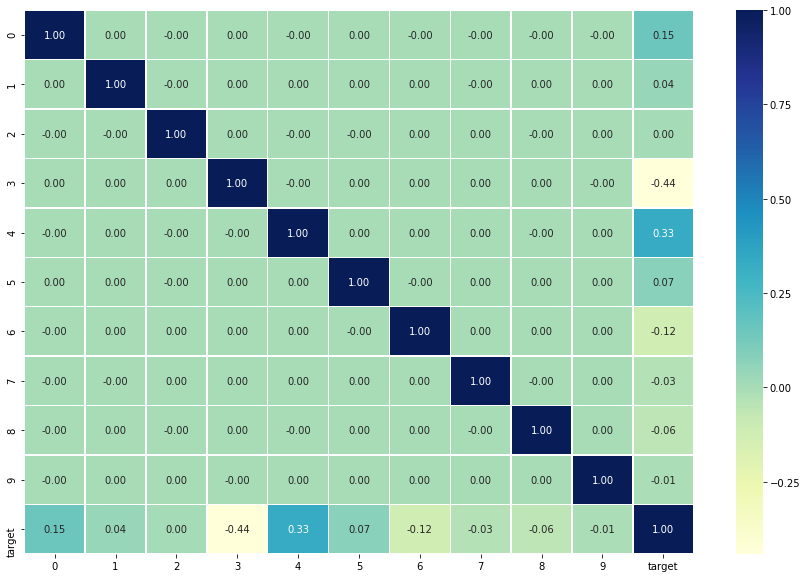

In [20]:
corr_matrix = data.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [21]:
data.isnull().sum()

0         0
1         0
2         0
3         0
4         0
5         0
6         0
7         0
8         0
9         0
target    0
dtype: int64

In [22]:
from scipy.stats import zscore
z=np.abs(zscore(data))
print(data.shape)
df_sonar=data.loc[(z<3).all(axis=1)]
print(df_sonar.shape)


(207, 11)
(204, 11)


In [23]:
df_sonar["target"].value_counts()

0    108
1     96
Name: target, dtype: int64

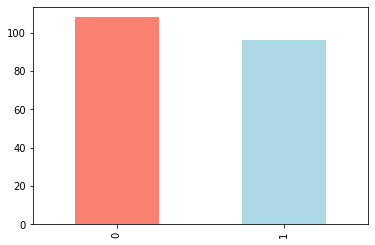

In [24]:
df_sonar["target"].value_counts().plot(kind="bar", color=["salmon", "lightblue"]);

In [25]:
# Split data into X and y
x = df_sonar.drop("target", axis=1)

y = df_sonar["target"]

In [26]:
print(x.shape)
x

(204, 10)


,0,1,2,3,4,5,6,7,8,9
0,-0.970285,1.017654,0.830432,0.120147,0.299120,0.202682,-0.226988,0.384837,0.004329,-0.082679
1,-0.324435,0.876876,0.228203,0.868926,0.098053,-0.269122,-0.421778,0.081072,0.014185,-0.432334
2,0.853571,0.697734,-0.023602,-0.123425,-0.584388,0.351808,0.478187,-0.215424,-0.533955,-0.425182
3,-0.061337,0.226034,0.635198,0.152907,0.150982,0.081111,-0.374523,0.070143,0.119454,-0.427480
4,-0.605423,0.901962,0.804550,0.271896,0.496832,0.464410,-0.224909,0.105504,-0.202842,-0.235048
...,...,...,...,...,...,...,...,...,...,...
202,0.049918,-1.028980,0.265634,0.026018,-0.014738,0.097506,0.012021,0.178998,0.029362,-0.268631
203,0.228374,-1.149870,0.200437,0.043461,0.182020,0.010158,0.084858,0.266152,-0.068963,-0.307679
204,0.306763,-1.147756,0.248975,-0.058557,0.161337,0.013778,0.049391,0.227866,-0.070132,-0.313294
205,-0.038083,-0.994049,0.201938,-0.060790,-0.147673,-0.088874,0.018656,0.069504,-0.024406,-0.165303


In [27]:
print(y.shape)
y

(204,)


0      1
1      1
2      1
3      1
4      1
      ..
202    0
203    0
204    0
205    0
206    0
Name: target, Length: 204, dtype: int32

In [28]:
df_sonar.skew()

0         0.197912
1         0.426983
2         0.203336
3         0.466608
4        -0.063192
5         0.280952
6         0.290709
7        -0.039269
8         0.226492
9        -0.440861
target    0.118726
dtype: float64

In [29]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
x=scale.fit_transform(x)

In [30]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=42)

In [31]:
from sklearn.naive_bayes import GaussianNB

models = {"Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier(),
          "GaussianNB":GaussianNB(),
          "SVC":SVC(),
          "DecisionTreeClassifier":DecisionTreeClassifier(),
         }

# Create a function to fit and score models
def fit_and_score(models, x_train, x_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of differetn Scikit-Learn machine learning models
    X_train : training data (no labels)
    X_test : testing data (no labels)
    y_train : training labels
    y_test : test labels
    """
    # Set random seed
    np.random.seed(51)
    # Make a dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(x_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(x_test, y_test)
    return model_scores

In [32]:

model_scores = fit_and_score(models=models,
                             x_train=x_train,
                             x_test=x_test,
                             y_train=y_train,
                             y_test=y_test)

model_scores


{'Logistic Regression': 0.8048780487804879,
 'KNN': 0.8536585365853658,
 'Random Forest': 0.8292682926829268,
 'GaussianNB': 0.7804878048780488,
 'SVC': 0.8292682926829268,
 'DecisionTreeClassifier': 0.7804878048780488}

In [33]:
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
models = {"Random Forest": RandomForestClassifier(n_estimators=100),
          "Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "GaussianNB":GaussianNB(),
          "SVC":SVC(),
          "DecisionTreeClassifier":DecisionTreeClassifier(),
          "GradientBoostingClassifier":GradientBoostingClassifier(),
         }
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=.20)

# Create a function to fit and score models
def fit_and_score(models, x_train, x_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of differetn Scikit-Learn machine learning models
    X_train : training data (no labels)
    X_test : testing data (no labels)
    y_train : training labels
    y_test : test labels
    """
    # Make a dictionary to keep model scores
    model_acc_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(x_train, y_train)
        y_pred1=model.predict(x_test)
        # Evaluate the model and append its score to model_scores
        model_acc_scores[name] = accuracy_score(y_test,y_pred1)

    return model_acc_scores

In [34]:
model_acc_scores = fit_and_score(models=models,
                             x_train=x_train,
                             x_test=x_test,
                             y_train=y_train,
                             y_test=y_test,
                             )

model_acc_scores

{'Random Forest': 0.8048780487804879,
 'Logistic Regression': 0.8048780487804879,
 'KNN': 0.8536585365853658,
 'GaussianNB': 0.7804878048780488,
 'SVC': 0.8292682926829268,
 'DecisionTreeClassifier': 0.7804878048780488,
 'GradientBoostingClassifier': 0.7804878048780488}

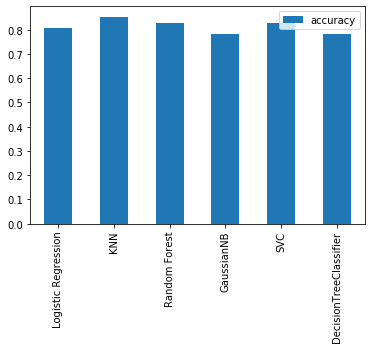

In [35]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar();

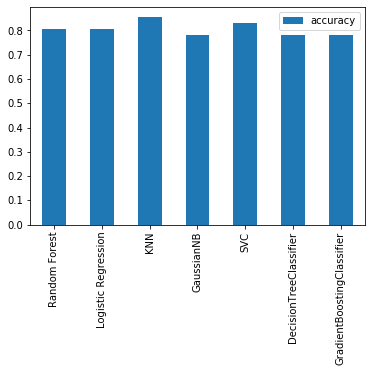

In [36]:
model_compare = pd.DataFrame(model_acc_scores, index=["accuracy"])
model_compare.T.plot.bar()

In [37]:
def get_cv_scores(model):
    scores = cross_val_score(model,
                             x_train,
                             y_train,
                             cv=5,
                             scoring='accuracy')
    
    print('CV Mean: ', np.mean(scores))
    print('STD: ', np.std(scores))
    print('\n')

In [38]:
rf=RandomForestClassifier(n_estimators=100,random_state=42)
rf.fit(x_train,y_train)
get_cv_scores(rf)

CV Mean:  0.8169563279857398
STD:  0.04703409570079012




In [39]:
lg=LogisticRegression()
lg.fit(x_train,y_train)
get_cv_scores(lg)


CV Mean:  0.7665886809269162
STD:  0.04339792555037256




In [40]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
get_cv_scores(knn)


CV Mean:  0.7296457219251338
STD:  0.04336702946168543




In [41]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
get_cv_scores(dtc)

CV Mean:  0.7423351158645277
STD:  0.030619760845614807




In [42]:
svc=SVC()
svc.fit(x_train,y_train)
get_cv_scores(svc)

CV Mean:  0.834792780748663
STD:  0.08334824401667303




In [43]:
max_acc_score=0
for acc_state in range(42,100):      
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=acc_state,test_size=.20)
    rm=RandomForestClassifier(n_estimators=100)
    rm.fit(x_train,y_train)
    y_predrm=rm.predict(x_test)
    accuracy_score1=accuracy_score(y_test,y_predrm)
    if accuracy_score1 > max_acc_score:
        max_acc_score=accuracy_score1
        final_acc_state=acc_state
print('max acc score corresponding to',final_acc_state,'is:', max_acc_score)

max acc score corresponding to 48 is: 0.9024390243902439


In [44]:
max_acc_score=0
for acc_state in range(42,100):      
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=acc_state,test_size=.22)
    lg=SVC()
    lg.fit(x_train,y_train)
    y_predsvc=lg.predict(x_test)
    accuracy_score1=accuracy_score(y_test,y_predsvc)
    if accuracy_score1 > max_acc_score:
        max_acc_score=accuracy_score1
        final_acc_state=acc_state
print('max acc score corresponding to',final_acc_state,'is:', max_acc_score)

max acc score corresponding to 78 is: 0.9555555555555556


In [45]:
max_acc_score=0
for acc_state in range(42,100):      
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=acc_state,test_size=.22)
    knn=KNeighborsClassifier()
    knn.fit(x_train,y_train)
    y_predknn=knn.predict(x_test)
    accuracy_score1=accuracy_score(y_test,y_predknn)
    if accuracy_score1 > max_acc_score:
        max_acc_score=accuracy_score1
        final_acc_state=acc_state
print('max acc score corresponding to',final_acc_state,'is:', max_acc_score)

max acc score corresponding to 78 is: 0.9111111111111111


In [46]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=78,test_size=.22)
kernellist=['linear','poly','rbf']
for i in kernellist:
    svc=SVC(kernel=i)
    svc.fit(x_train,y_train)
    svc.score(x_train,y_train)
    predsvc=svc.predict(x_test)
    print(accuracy_score(y_test,predsvc))
    print(confusion_matrix(y_test,predsvc))
    print(classification_report(y_test,predsvc))

0.7111111111111111
[[17  6]
 [ 7 15]]
              precision    recall  f1-score   support

           0       0.71      0.74      0.72        23
           1       0.71      0.68      0.70        22

    accuracy                           0.71        45
   macro avg       0.71      0.71      0.71        45
weighted avg       0.71      0.71      0.71        45

0.8
[[22  1]
 [ 8 14]]
              precision    recall  f1-score   support

           0       0.73      0.96      0.83        23
           1       0.93      0.64      0.76        22

    accuracy                           0.80        45
   macro avg       0.83      0.80      0.79        45
weighted avg       0.83      0.80      0.79        45

0.9555555555555556
[[22  1]
 [ 1 21]]
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        23
           1       0.95      0.95      0.95        22

    accuracy                           0.96        45
   macro avg       0.96      

In [47]:
from sklearn.model_selection import GridSearchCV
grid_2 = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001]
         }
# Split into train and test sets
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=85,test_size=.20)

# Set n_jobs to -1 to use all cores (NOTE: n_jobs=-1 is broken as of 8 Dec 2019, using n_jobs=1 works)
clf = SVC(kernel='rbf')

# Setup GridSearchCV
gs_clf = GridSearchCV(estimator=clf,
                      param_grid=grid_2,
                      cv=5, # 5-fold cross-validation
                      verbose=2) # print out progress

# Fit the RandomizedSearchCV version of clf
gs_clf.fit(x_train, y_train);

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ..........

[CV] ................................. C=100, gamma=0.1, total=   0.0s
[CV] C=100, gamma=0.1 ................................................
[CV] ................................. C=100, gamma=0.1, total=   0.0s
[CV] C=100, gamma=0.1 ................................................
[CV] ................................. C=100, gamma=0.1, total=   0.0s
[CV] C=100, gamma=0.1 ................................................
[CV] ................................. C=100, gamma=0.1, total=   0.0s
[CV] C=100, gamma=0.01 ...............................................
[CV] ................................ C=100, gamma=0.01, total=   0.0s
[CV] C=100, gamma=0.01 ...............................................
[CV] ................................ C=100, gamma=0.01, total=   0.0s
[CV] C=100, gamma=0.01 ...............................................
[CV] ................................ C=100, gamma=0.01, total=   0.0s
[CV] C=100, gamma=0.01 ...............................................
[CV] .

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s



[CV] C=100, gamma=0.0001 .............................................
[CV] .............................. C=100, gamma=0.0001, total=   0.0s
[CV] C=100, gamma=0.0001 .............................................
[CV] .............................. C=100, gamma=0.0001, total=   0.0s
[CV] C=1000, gamma=1 .................................................
[CV] .................................. C=1000, gamma=1, total=   0.0s
[CV] C=1000, gamma=1 .................................................
[CV] .................................. C=1000, gamma=1, total=   0.0s
[CV] C=1000, gamma=1 .................................................
[CV] .................................. C=1000, gamma=1, total=   0.0s
[CV] C=1000, gamma=1 .................................................
[CV] .................................. C=1000, gamma=1, total=   0.0s
[CV] C=1000, gamma=1 .................................................
[CV] .................................. C=1000, gamma=1, total=   0.0s
[CV] 

[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:    0.1s finished


In [ ]:
gs_clf.best_params_


In [48]:
def evaluate_preds(y_test, y_preds):
    """
    Performs evaluation comparison on y_true labels vs. y_pred labels.
    """
    accuracy = accuracy_score(y_test, y_preds)
    precision = precision_score(y_test, y_preds)
    recall = recall_score(y_test, y_preds)
    f1 = f1_score(y_test, y_preds)
    metric_dict = {"accuracy": round(accuracy, 2),
                   "precision": round(precision, 2), 
                   "recall": round(recall, 2),
                   "f1": round(f1, 2)}
    print(f"Acc: {accuracy * 100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 score: {f1:.2f}")

    return metric_dict
# Max predictions with the GridSearchCV classifier
gs_y_preds = gs_clf.predict(x_test)

# Evaluate the predictions
gs_metrics = evaluate_preds(y_test, gs_y_preds)

Acc: 90.24%
Precision: 0.95
Recall: 0.86
F1 score: 0.90


In [49]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=78,test_size=.22)
svc=SVC(kernel='rbf')
svc.fit(x_train,y_train)
svc.score(x_train,y_train)
svcpred=svc.predict(x_test)
print('Accuracy Score:',accuracy_score(y_test,svcpred))
print('Confusion Matrix:',confusion_matrix(y_test,svcpred))
print('Classification Report:',classification_report(y_test,svcpred))

Accuracy Score: 0.9555555555555556
Confusion Matrix: [[22  1]
 [ 1 21]]
Classification Report:               precision    recall  f1-score   support

           0       0.96      0.96      0.96        23
           1       0.95      0.95      0.95        22

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



In [50]:
from sklearn.ensemble import AdaBoostClassifier
svc=SVC(probability=True,kernel='rbf')
ad = AdaBoostClassifier(n_estimators=100, base_estimator=svc)
ad.fit(x, y)
ad.score(x_train,y_train)
adpred=ad.predict(x_test)
print('Accuracy Score:',accuracy_score(y_test,adpred))
print('Confusion Matrix:',confusion_matrix(y_test,adpred))
print('Classification Report:',classification_report(y_test,adpred))


Accuracy Score: 1.0
Confusion Matrix: [[23  0]
 [ 0 22]]
Classification Report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        22

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



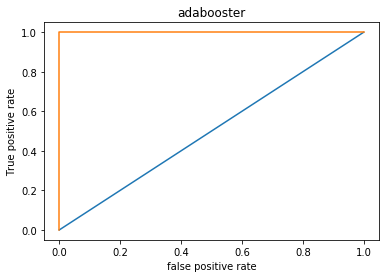

In [51]:
# Make predictions with probabilities
y_probs = ad.predict_proba(x_test)

# Keep the probabilites of the positive class only
y_probs = y_probs[:, 1]

# Calculate fpr, tpr and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Check the false positive rate
fpr
plt.plot([0,1],[0,1])
plt.plot(fpr,tpr,label='adabooster')
plt.xlabel('false positive rate')
plt.ylabel('True positive rate')
plt.title('adabooster')
plt.show()


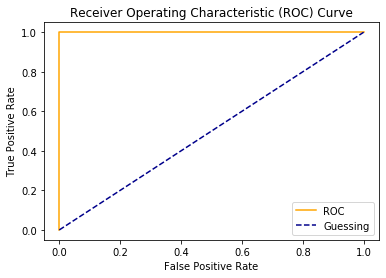

In [52]:
def plot_roc_curve(fpr, tpr):
    """
    Plots a ROC curve given the false positve rate (fpr) and 
    true postive rate (tpr) of a classifier.
    """
    # Plot ROC curve
    plt.plot(fpr, tpr, color='orange', label='ROC')
    # Plot line with no predictive power (baseline)
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--', label='Guessing')
    # Customize the plot
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
    
plot_roc_curve(fpr, tpr)

In [53]:
roc_auc_score(y_test, y_probs)

1.0

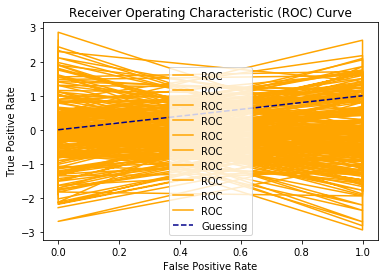

In [54]:
plot_roc_curve(adpred, x_test)

In [62]:
y_predad1 = evaluate_preds(y_test, adpred)
y_predad1

Acc: 100.00%
Precision: 1.00
Recall: 1.00
F1 score: 1.00


{'accuracy': 1.0, 'precision': 1.0, 'recall': 1.0, 'f1': 1.0}

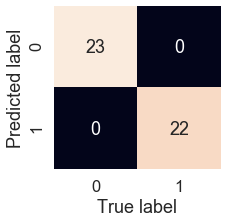

In [63]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, adpred):
    """
    Plots a nice looking confusion matrix using Seaborn's heatmap()
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, adpred),
                     annot=True,
                     cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    
plot_conf_mat(y_test, adpred)

In [64]:
from sklearn import svm
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
svc = svm.SVC()
clf = GridSearchCV(svc, parameters)
clf.fit(x_test, y_test)


sorted(clf.cv_results_.keys())
print(clf.best_params_)


{'C': 10, 'kernel': 'rbf'}


In [65]:
sv=svm.SVC(kernel='linear',C=1)
sv.fit(x_test,y_test)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [66]:
from sklearn.externals import joblib
joblib.dump(ad,'sonar_predict.pkl')

['sonar_predict.pkl']

In [67]:
ada_from_joblib=joblib.load('sonar_predict.pkl')
joblib_y_preds = ada_from_joblib.predict(x_test)
evaluate_preds(y_test, joblib_y_preds)

Acc: 100.00%
Precision: 1.00
Recall: 1.00
F1 score: 1.00


{'accuracy': 1.0, 'precision': 1.0, 'recall': 1.0, 'f1': 1.0}